In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [97]:
df = pd.read_csv('Train-1617360447408-1660719685476.csv', na_values=['?'])
df

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),NaN,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),NaN,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),NaN,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),NaN,5,NaN,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),NaN,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,39934,124202466,23450508,Caucasian,Female,[70-80),NaN,11,InternalMedicine,40,...,No,Steady,No,No,No,No,No,No,Yes,0
66583,47366,145667070,29324601,Caucasian,Male,[80-90),NaN,4,NaN,39,...,No,No,No,No,No,No,No,No,No,1
66584,76555,231061116,2179062,Caucasian,Female,[60-70),NaN,2,NaN,24,...,No,No,No,No,No,No,No,No,Yes,1
66585,25392,84911682,20531754,NaN,Female,[80-90),NaN,4,InternalMedicine,39,...,No,No,No,No,No,No,No,No,No,0


In [98]:
print(df.shape)
print(df.columns)

(66587, 49)
Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'weight', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')


In [99]:
print(len(df['encounter_id'].unique()))
print(len(df['patient_id'].unique()))


48911
39650


In [100]:
df.isnull().sum()

index                     0
encounter_id              0
patient_id                0
race                   1504
gender                    0
age                       0
weight                64454
time_in_hospital          0
medical_specialty     32672
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                   15
diag_2                  231
diag_3                  954
diag_4                  954
diag_5                    0
number_diagnoses          0
X1                        0
X2                        0
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X8                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                 

In [101]:
df=df.drop(["weight","medical_specialty"],axis=1)


In [102]:
df = df.replace('?', np.nan)

In [103]:
df.isnull().sum()

index                    0
encounter_id             0
patient_id               0
race                  1504
gender                   0
age                      0
time_in_hospital         0
num_lab_procedures       0
num_procedures           0
num_medications          0
number_outpatient        0
number_emergency         0
number_inpatient         0
diag_1                  15
diag_2                 231
diag_3                 954
diag_4                 954
diag_5                   0
number_diagnoses         0
X1                       0
X2                       0
X3                       0
X4                       0
X5                       0
X6                       0
X7                       0
X8                       0
X9                       0
X10                      0
X11                      0
X12                      0
X13                      0
X14                      0
X15                      0
X16                      0
X17                      0
X18                      0
X

In [104]:
df = df.replace('Unknown/Invalid', np.nan)

df['gender'] = df['gender'].fillna(df['gender'].mode()[0])#fill gender wit most freq occured gender in column

<AxesSubplot:xlabel='readmitted', ylabel='count'>

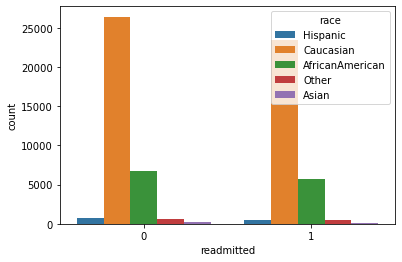

In [105]:
sns.countplot(df['readmitted'], hue=df['race'])

In [106]:
df['race'] = df['race'].fillna(df['race'].mode()[0])
df['diag_1'] = df['diag_1'].fillna(0)
df['diag_2'] = df['diag_2'].fillna(0)
df['diag_3'] = df['diag_3'].fillna(0)
df['diag_4'] = df['diag_4'].fillna(0)

<AxesSubplot:xlabel='age', ylabel='count'>

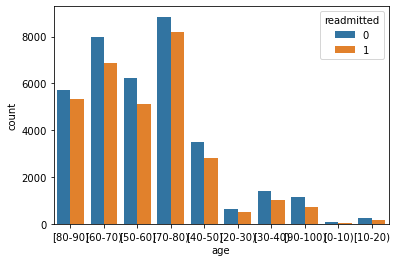

In [108]:
sns.countplot(df['age'], hue=df['readmitted'])

<AxesSubplot:xlabel='readmitted', ylabel='count'>

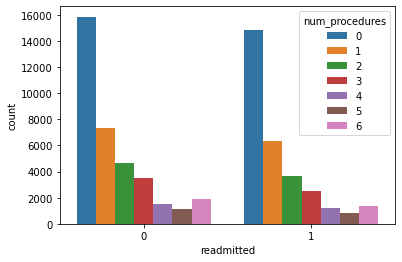

In [109]:
sns.countplot(df['readmitted'], hue=df['num_procedures'])

<AxesSubplot:xlabel='readmitted', ylabel='count'>

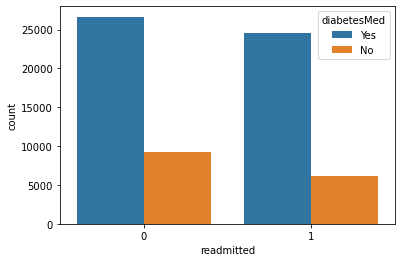

In [110]:
sns.countplot(df['readmitted'], hue=df['diabetesMed'])

<AxesSubplot:xlabel='readmitted', ylabel='count'>

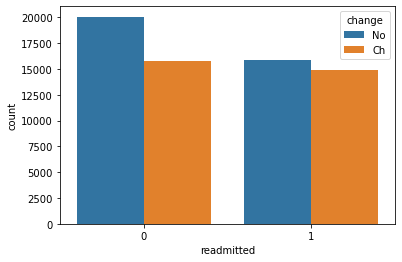

In [111]:
sns.countplot(df['readmitted'], hue=df['change'])

<AxesSubplot:xlabel='readmitted', ylabel='count'>

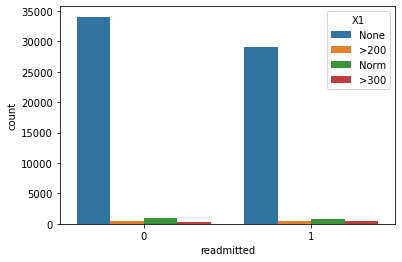

In [112]:
sns.countplot(df['readmitted'], hue=df['X1'])

<AxesSubplot:xlabel='readmitted', ylabel='count'>

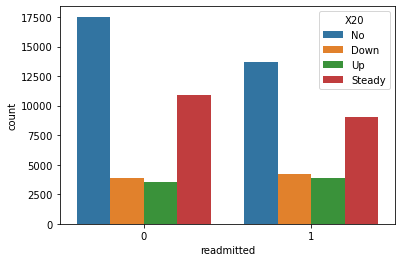

In [113]:
sns.countplot(df['readmitted'], hue=df['X20'])

In [107]:
col_label = ['race', 'gender', 'age', 'X1',
       'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
       'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X23', 'X24', 'X25', 'change', 'diabetesMed']


In [114]:
LE = LabelEncoder()
for i in col_label:
    df[i]=LE.fit_transform(df[i])
    """Label Encoder performs the conversion of these labels of categorical data into a numeric format.
    For example, if a dataset contains a variable ‘Gender’ with labels ‘Male’ and ‘Female’,
    then the label encoder would convert these labels into a number format and the resultant outcome would be [0,1]."""

In [115]:
scaling_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_5',
'number_diagnoses']

In [116]:
SS = StandardScaler()

for i in scaling_features:
    df[i] = SS.fit_transform(df[i].values.reshape(-1, 1))

In [117]:
df=df.drop(['diag_1', 'diag_2', 'diag_3', 'diag_4'],axis=1)#axis = 1 refers to column and axis = 0 refers to rows

In [128]:
X1 = df.drop("readmitted", axis=1)
Y1 = df["readmitted"]
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42, shuffle=True)
"""test_size=0.2 wch means 20% is test data rest 80% is train data """

In [131]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)#to predict train data

score = f1_score(y_test, lr_pred)#fbeta score is  a type of evaluation matrix
print(score)

0.4105973813420622


In [ ]:
"""We need to split a dataset into train and test sets to evaluate how well our machine learning model performs.
The train set is used to fit the model, the statistics of the train set are known.
The second set is called the test data set, this set is solely used for predictions."""